In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importing and Visualizing the data

In [2]:
from tensorflow.keras.datasets import mnist

2023-12-04 14:03:14.898567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
single_image = x_train[0]

print(single_image.shape)

(28, 28)


In [6]:
print(single_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

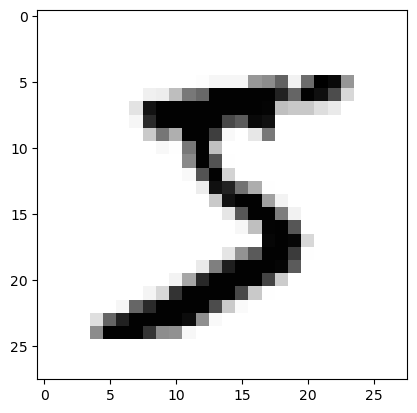

In [7]:
_ = plt.imshow(single_image, cmap="Greys")

In [8]:
print(y_train[0]) # The corresponding label

5


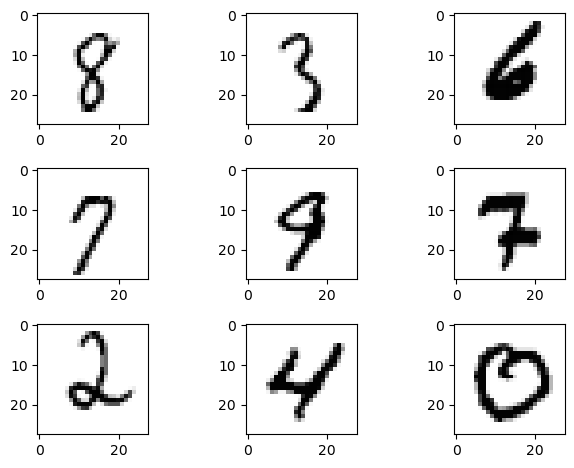

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()

for i in range(3):
    for j in range(3):
        img = x_train[np.random.randint(0, len(x_train))]
        ax[i,j].imshow(img, cmap="Greys")

# Data Preprocessing

In [10]:
print(x_train.min(), x_train.max())

0 255


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Store original shape of images
x_train_shape = x_train.shape
x_test_shape = x_test.shape

# Instantiate a Scaler
scaler = MinMaxScaler()

# Fit and normalize a reshaped 2D array; then reshape it back to include a dimension for the single colour channel
x_train = (
    scaler.fit_transform(
        x_train.reshape(x_train.shape[0] * x_train.shape[1], x_train.shape[2])
    )
).reshape(*x_train_shape, 1)


# Only transform and reshape the test data set
x_test = (
    scaler.transform(x_test.reshape(x_test.shape[0] * x_test.shape[1], x_test.shape[2]))
).reshape(*x_test_shape, 1)

In [13]:
print(x_train.min(), x_train.max())
print(x_train.shape)
print(x_test.shape)

0.0 1.0
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

print(y_cat_train.shape)
print(y_cat_test.shape)

(60000, 10)
(10000, 10)


# Build a Simple Artificial Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [17]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, verbose=1)

In [21]:
model.fit(
    x_train,
    y_cat_train,
    validation_data=(x_test, y_cat_test),
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2593 - accuracy: 0.9255 - val_loss: 0.1449 - val_accuracy: 0.9580
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9671 - val_loss: 0.1009 - val_accuracy: 0.9702
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0774 - accuracy: 0.9768 - val_loss: 0.0850 - val_accuracy: 0.9738
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.0729 - val_accuracy: 0.9784
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0703 - val_accuracy: 0.9784
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0655 - val_accuracy: 0.9809
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0717 - val_accuracy:

# Evaluate the ANN Model

In [22]:
metrics = pd.DataFrame(model.history.history)
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

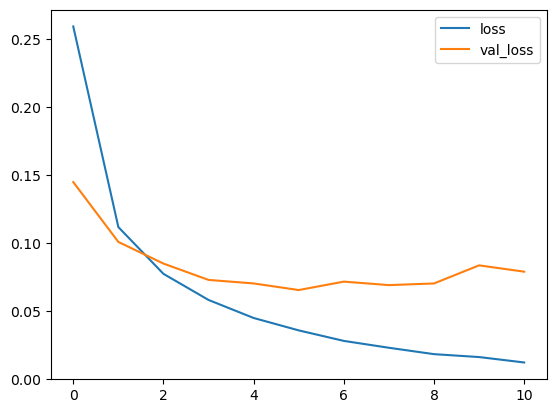

In [23]:
metrics[["loss", "val_loss"]].plot()

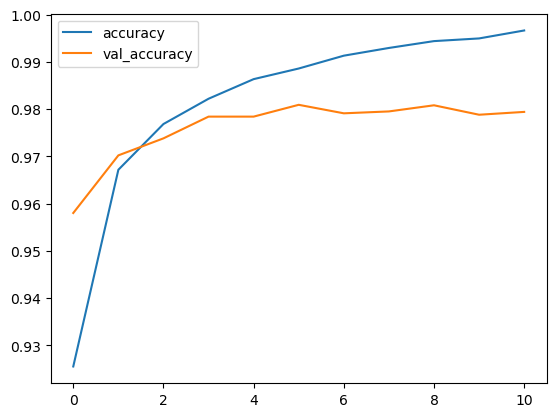

In [24]:
metrics[["accuracy", "val_accuracy"]].plot()

In [25]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.07899516820907593, 0.9793999791145325]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
y_pred = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 0s 1ms/step


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [29]:
print(confusion_matrix(y_test, y_pred))

[[ 967    0    3    1    0    0    4    1    3    1]
 [   0 1125    4    1    0    1    1    1    2    0]
 [   5    1 1013    1    2    0    3    2    5    0]
 [   0    0    8  986    0    4    0    4    2    6]
 [   3    0    6    0  954    0    3    6    0   10]
 [   2    0    0   11    1  868    4    1    4    1]
 [   3    2    3    1    2    3  942    0    2    0]
 [   2    2   13    1    0    0    0  996    4   10]
 [   3    0    3    4    2    2    1    3  953    3]
 [   2    2    0    4    4    3    1    0    3  990]]


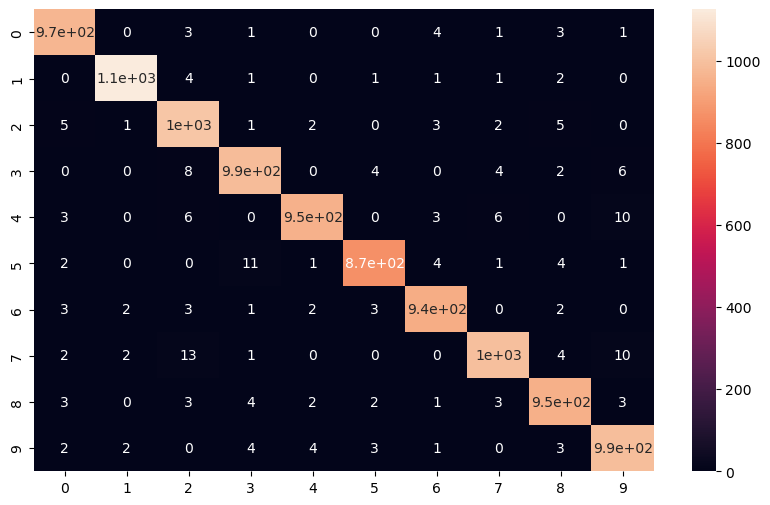

In [30]:
plt.figure(figsize=(10,6))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)